# Shiv Raj Singh



##  Stock Market Prediction using Numerical and Textual Analysis

### Objective: Create a hybrid model for stock price/performance
- prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)


### historical stock prices dataset :  finance.yahoo.com
### textual (news) dataset :  https://bit.ly/36fFPI6


In [3]:
#importing the necessary libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Load the textual (news) dataset

df1 = pd.read_csv("india-news-headlines.csv")
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
df1.shape

(3424067, 3)

In [6]:
df1.isnull().sum()     ##Check for duplicated values of the first dataset

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [7]:
df1.describe()   ##summarize the statistics of the dataframe

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [8]:
df1.drop('headline_category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
df1.head(-5)

Showing part of the whole dataset:


,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3424057,20201231,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,Azim Premji organisation's name misused to che...
3424060,20201231,Get govt nod to probe officials: MP to agencies


In [9]:
#removing unwanted characters from the news in the first dataset

df1.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df1["headline_text"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1                  Fissures in Hurriyat over Pak visit
2                America's unwanted heading for India 
3                   For bigwigs  it is destination Goa
4                 Extra buses to clear tourist traffic
Name: headline_text, dtype: object

In [10]:
# Load the historical stock prices dataset

df2 = pd.read_csv("hist.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,17.780001,17.885000,17.780001,17.868000,17.868000,15.0
1,2020-06-09,17.830000,17.830000,17.715000,17.774000,17.774000,3.0
2,2020-06-10,17.775999,17.775999,17.775999,17.775999,17.775999,0.0
3,2020-06-11,18.084999,18.084999,17.830000,17.868999,17.868999,5.0
4,2020-06-12,17.750000,17.750000,17.462000,17.462000,17.462000,13.0


# Data exploration of the second dataset

In [11]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000
mean,24.901064,25.131748,24.659296,24.902280,24.902280,2063.44800
std,2.854052,2.879741,2.781661,2.810356,2.810356,12091.92945
min,17.379000,17.495001,17.379000,17.379000,17.379000,0.00000
25%,24.105000,24.317499,23.945000,24.095500,24.095500,13.50000
50%,25.517499,25.702500,25.260000,25.485000,25.485000,67.00000
75%,26.981251,27.158500,26.547500,26.932251,26.932251,213.25000
max,29.530001,30.160000,28.313999,29.398001,29.398001,131415.00000


In [12]:
df2.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [13]:
df2["Date"]= pd.to_datetime(df2["Date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [14]:
df2=df2[["Date","Open","High","Low","Close","Volume"]] #Analysing the information of the second dataset
df2.head(-5)

,Date,Open,High,Low,Close,Volume
0,2020-06-08,17.780001,17.885000,17.780001,17.868000,15.0
1,2020-06-09,17.830000,17.830000,17.715000,17.774000,3.0
2,2020-06-10,17.775999,17.775999,17.775999,17.775999,0.0
3,2020-06-11,18.084999,18.084999,17.830000,17.868999,5.0
4,2020-06-12,17.750000,17.750000,17.462000,17.462000,13.0
...,...,...,...,...,...,...
242,2021-05-24,27.885000,27.900000,27.740000,27.886999,85.0
243,2021-05-25,27.750000,28.037001,27.670000,28.037001,81.0
244,2021-05-26,27.853001,27.853001,27.853001,27.853001,744.0
245,2021-05-27,27.754999,27.920000,27.695000,27.919001,525.0


# Analysis and visualisation of numerical data

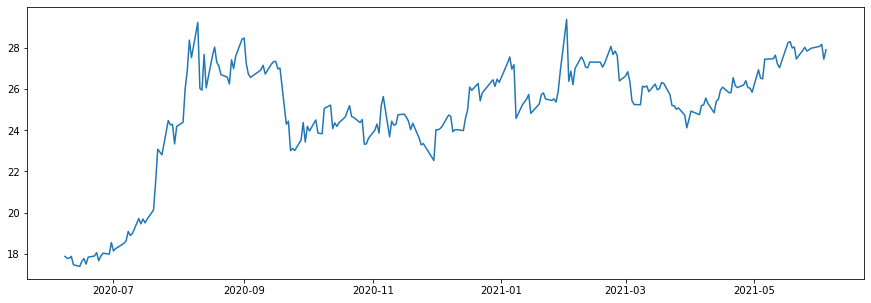

In [15]:
# Extract the dataframe and visualise the stock price with respect to time
df2['Date'] = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2['Date']
df2.dropna(inplace=True)
#plot
plt.figure(figsize=(15,5))
plt.plot(df2['Close'], label='Close Price history')

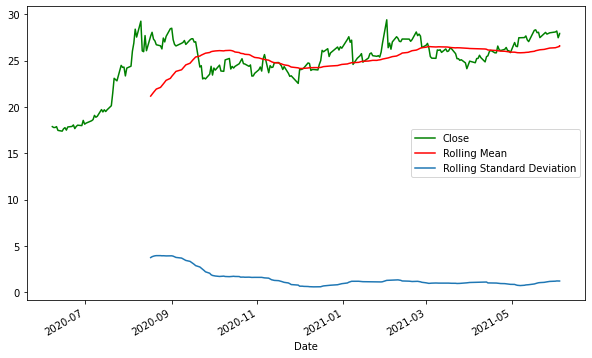

In [16]:
#Plotting moving average
close = df2['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df2['Close'].plot(color = 'g', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

# Making predictions of the numerical data

In [17]:
train = df1[:700]
valid = df1[700:]
train.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India
3,20010102,For bigwigs it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [18]:
# Analysis of Textual Data
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names = columns)
news

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [19]:
news.drop(0, inplace=True)   ##Data preprocessing
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [20]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


# Visualisation of textual data

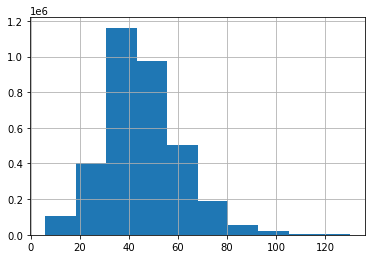

<Figure size 720x288 with 0 Axes>

In [21]:
news['News'].str.len().hist()
plt.figure(figsize=(10,4))
plt.show()

# Addition of subjectivity and polarity scores

In [22]:
!pip install textblob

In [23]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer   ##Libraries necessary for sentiment analysis

from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
news['Subjectivity'] = news['News'].apply(getSubjectivity) ##Adding subjectivity score

news['Polarity'] = news['News'].apply(getPolarity) ##Adding polarity scores

news

# Visualisation of polarity scores

In [ ]:
plt.figure(figsize = (10,5))
news['Polarity'].hist(color = 'green')

# Visualization of Subjectivity Scores

In [ ]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'orange')

In [ ]:
# Performing Sentiment Analysis over the news Headlines

sia = SentimentIntensityAnalyzer()  ##Adding sentiment score to news

news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']] ##Adding sentiment score to news

news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']] ##Adding sentiment score to news

news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']] ##Adding sentiment score to news

news   ##Information of the dataframe showing subjectivity, polarity and sentiment score of news

# Merging numerical and textual data to create a hybrid model

In [ ]:
merge = news  ## Merging numerical and textual data to create a hybrid model
merge

# Create a dataset for model training

In [ ]:
clf = merge[['Subjectivity', 'Polarity',  'Negative', 'Neutral' ,'Positive']]  ##Dataset for the purpose of model training
clf

# Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler   ##Import the necessary libraries

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(clf))

df.columns = clf.columns
df.index = clf.index
df.head()    ##Printing the top 5 rows for observation purpose

In [ ]:
df.shape

In [ ]:
X = df[: 1712033]
X.head()

In [ ]:
Y = df[1712034 :]
Y.head()

# Split the dataset into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

x_train[:10]

# Implementation Of RandomForestRegressor on the model

In [ ]:
rf = RandomForestRegressor()   ##Implementing the random forest regressor model

rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

print(prediction[:10])
print(y_test[:10])

In [ ]:
print('Mean Squared error: ',mean_squared_error(prediction,y_test)) ##Calculating the mean squared error of RandomForestRegressor Model

# Observation :
So, we can observe that the mean squared error generated from the RandomForestRegressor Model is 0.0.0370(app.)

# Implemenation of DecisionTreeRegressor on the Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor   ##Implementing the DecisionTreeRegressor Model

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

predictions = dtr.predict(x_test)
print(predictions[:10])

In [ ]:
print(y_test[:10])

In [ ]:
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

# Observation :
- So, we can observe that the mean squared error generated from the DecisionTreeRegressor Model is 0.0.03886(app.)

# Conclusions :
- We were able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentiment analysis of news headlines.

- We have used two models, Random Forest Regressor and Decision Tree Regressor for carrying out hybrid analysis.

- Since the mean squared error of Random Forest Regressor is 0.0005 , therefore it serves as a suitable model for hybrid analysis.